In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import os

from datetime import datetime
from tqdm import tqdm

import ccxt

exchange = ccxt.binance()

In [ ]:
markets = exchange.load_markets()

perpetual_pairs = [
    market for market, details in markets.items()
    if details['swap'] is True  
]
perpetual_pairs_usd = [pair for pair in perpetual_pairs if pair.endswith("USDT") or pair.endswith("USDC")]
perpetual_pairs_usd

In [ ]:
from_ts = exchange.parse8601('2022-01-01 00:00:00')
ohlcv = exchange.fetch_ohlcv('BTC/USDT', '5m', since=from_ts, limit=1000)
while True:
    from_ts = ohlcv[-1][0]
    new_ohlcv = exchange.fetch_ohlcv('BTC/USDT', '5m', since=from_ts, limit=1000)
    ohlcv.extend(new_ohlcv)
    if len(new_ohlcv)!=1000:
    	break

In [5]:
output_dir = r"C:\Users\tariq\algorithmic_trading\5min_perp"


In [8]:
os.makedirs(output_dir, exist_ok=True)

def fetch_ohlcv_to_parquet(pair, timeframe='5m', since='2020-01-01 00:00:00'):
    pair_name = pair.replace("/", "_").replace(":", "_")
    
    pair_path = os.path.join(output_dir, f"{pair_name}.parquet")
    if os.path.exists(pair_path):
        print(f"{pair} data already exists")
        return
    from_ts = exchange.parse8601(since)
    ohlcv = exchange.fetch_ohlcv(pair, timeframe, since=from_ts, limit=1000)
    while True:
        from_ts = ohlcv[-1][0]
        new_ohlcv = exchange.fetch_ohlcv(pair, timeframe, since=from_ts, limit=1000)
        ohlcv.extend(new_ohlcv)
        
        if len(new_ohlcv)!=1000:
            break

    df = pd.DataFrame(ohlcv, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df['date'] = pd.to_datetime(df['date'], unit='ms') 

    df.to_parquet(pair_path)
    print(f"saved {pair} data to {pair_path}")

In [9]:
perpetual_pairs_usd_clean = [pair.replace(':USDT', '') for pair in perpetual_pairs_usd]
print(len(perpetual_pairs_usd_clean))

451


In [16]:
print(len(os.listdir(output_dir)))

450


In [17]:
for pair in tqdm(perpetual_pairs_usd):
    try:
        fetch_ohlcv_to_parquet(pair, since='2020-01-01 00:00:00')
    except Exception as e:
        print(f"Error fetching data for {pair}: {e}")

  0%|          | 0/451 [00:00<?, ?it/s]

BTC/USDT:USDT data already exists
ETH/USDT:USDT data already exists
BCH/USDT:USDT data already exists
XRP/USDT:USDT data already exists
EOS/USDT:USDT data already exists
LTC/USDT:USDT data already exists
TRX/USDT:USDT data already exists
ETC/USDT:USDT data already exists
LINK/USDT:USDT data already exists
XLM/USDT:USDT data already exists
ADA/USDT:USDT data already exists
XMR/USDT:USDT data already exists
DASH/USDT:USDT data already exists
ZEC/USDT:USDT data already exists
XTZ/USDT:USDT data already exists
BNB/USDT:USDT data already exists
ATOM/USDT:USDT data already exists
ONT/USDT:USDT data already exists
IOTA/USDT:USDT data already exists
BAT/USDT:USDT data already exists
VET/USDT:USDT data already exists
NEO/USDT:USDT data already exists
QTUM/USDT:USDT data already exists
IOST/USDT:USDT data already exists
THETA/USDT:USDT data already exists
ALGO/USDT:USDT data already exists
ZIL/USDT:USDT data already exists
KNC/USDT:USDT data already exists
ZRX/USDT:USDT data already exists
COMP/

100%|██████████| 451/451 [00:01<00:00, 311.41it/s]

Error fetching data for BTCST/USDT:USDT: binance {"code":-1122,"msg":"Invalid symbol status."}
COTI/USDT:USDT data already exists
CHR/USDT:USDT data already exists
MANA/USDT:USDT data already exists
ALICE/USDT:USDT data already exists
HBAR/USDT:USDT data already exists
ONE/USDT:USDT data already exists
LINA/USDT:USDT data already exists
STMX/USDT:USDT data already exists
DENT/USDT:USDT data already exists
CELR/USDT:USDT data already exists
HOT/USDT:USDT data already exists
MTL/USDT:USDT data already exists
OGN/USDT:USDT data already exists
NKN/USDT:USDT data already exists
SC/USDT:USDT data already exists
DGB/USDT:USDT data already exists
1000SHIB/USDT:USDT data already exists
BAKE/USDT:USDT data already exists
GTC/USDT:USDT data already exists
BTCDOM/USDT:USDT data already exists
IOTX/USDT:USDT data already exists
RAY/USDT:USDT data already exists
C98/USDT:USDT data already exists
MASK/USDT:USDT data already exists
ATA/USDT:USDT data already exists
DYDX/USDT:USDT data already exists
1

In [64]:
for file in os.listdir(output_dir):
    filepath  = os.path.join(output_dir, file)
    os.remove(filepath)

In [75]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
df_btc = pd.read_parquet("C:\\Users\\tariq\\algorithmic_trading\\5min_perp\\BTC_USDT_USDT.parquet")
df_btc

,date,open,high,low,close,volume
0,2025-01-01 00:00:00,93548.8,93690.0,93514.2,93648.4,341.604
1,2025-01-01 00:05:00,93648.3,93666.7,93576.9,93585.9,166.341
2,2025-01-01 00:10:00,93586.0,93637.2,93460.2,93631.2,480.204
3,2025-01-01 00:15:00,93631.2,93829.4,93588.0,93781.0,545.647
4,2025-01-01 00:20:00,93781.0,93885.0,93680.0,93712.0,392.042
...,...,...,...,...,...,...
25360,2025-03-29 23:15:00,82425.0,82512.6,82424.9,82438.5,348.204
25361,2025-03-29 23:20:00,82438.5,82461.6,82391.2,82461.6,125.845
25362,2025-03-29 23:25:00,82461.5,82461.6,82407.1,82414.0,84.142
25363,2025-03-29 23:30:00,82414.0,82449.1,82353.3,82380.2,98.953


<Axes: title={'center': 'BTC/USDT 5m'}, xlabel='date'>

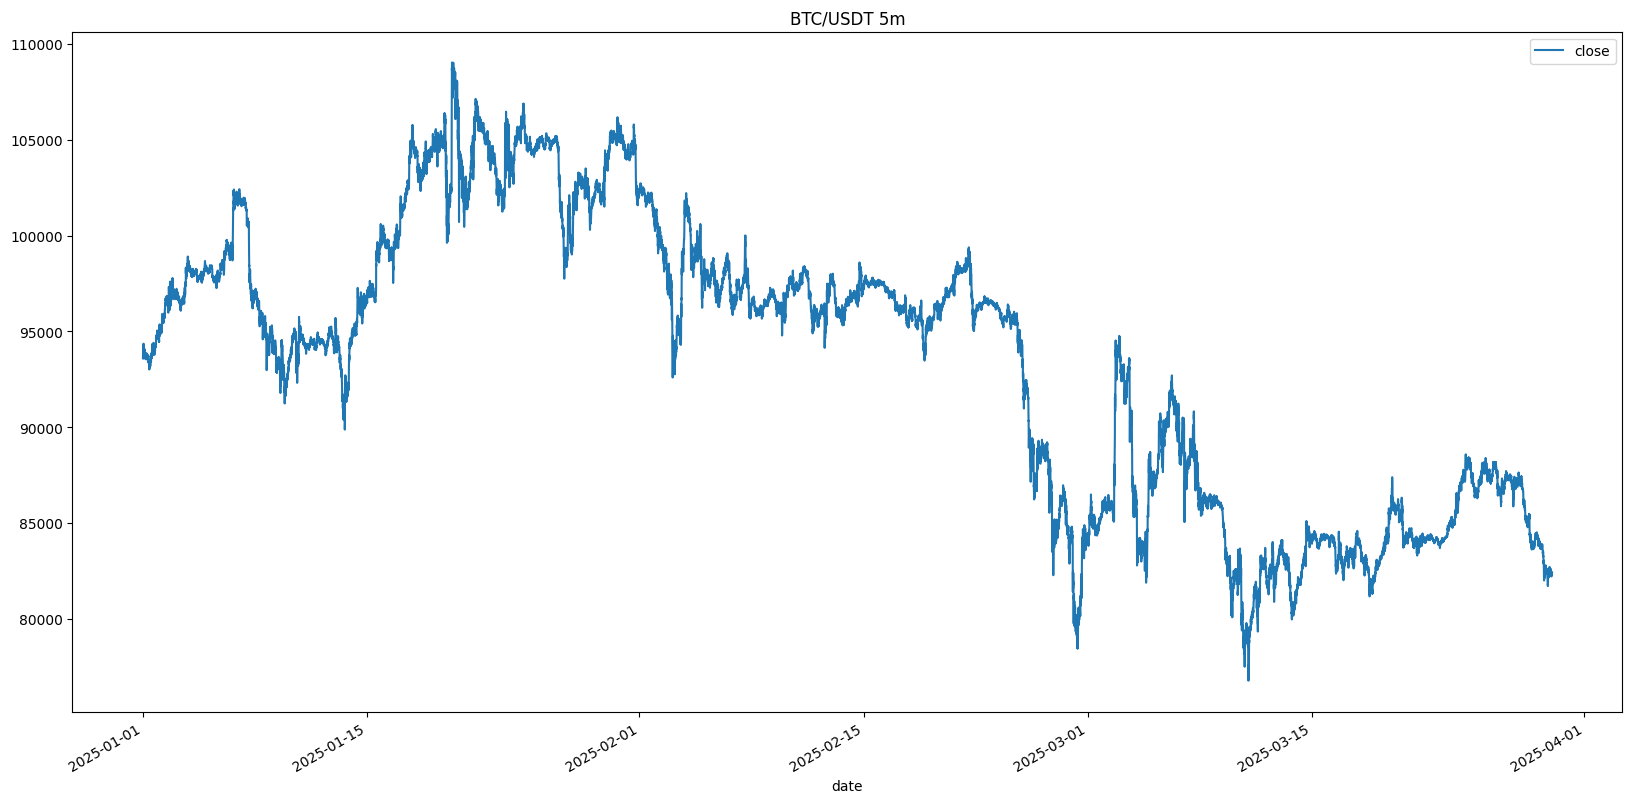

In [77]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
df_btc = pd.read_parquet("C:\\Users\\tariq\\algorithmic_trading\\5min_perp\\BTC_USDT_USDT.parquet")

df_btc.plot(x= 'date', y= 'close', title= 'BTC/USDT 5m', figsize= (20,10))

### Cross de moyenne mobiles exponentielles

In [5]:
df["ema20"] = df["close"].ewm(span=20, adjust=False).mean()
df["ema50"] = df["close"].ewm(span=50, adjust=False).mean()

df["prev_ema20"] = df["ema20"].shift(1)
df["prev_ema50"] = df["ema50"].shift(1)

df["buy_signal"] = (df["ema20"] > df["ema50"]) & (df["prev_ema20"] <= df["prev_ema50"]) 
df["sell_signal"] = (df["ema20"] < df["ema50"]) & (df["prev_ema20"] >= df["prev_ema50"])  

df["position"] = np.nan

df.loc[df["buy_signal"], "position"] = 1
df.loc[df["sell_signal"], "position"] = 0
#propagate last position vers le bas 
df["position"] = df["position"].ffill().fillna(0)
df["log_returns"] = np.log(df["close"] / df["close"].shift(1))


df["pnl"] = df["position"].shift(1) * df["log_returns"]
df["cumulative_pnl"] = (1 + df["pnl"]).cumprod() - 1
#btc returns
df["btc_cum_returns"] = (1 + df["log_returns"]).cumprod() - 1


In [6]:
df

,open,high,low,close,volume,ema20,ema50,prev_ema20,prev_ema50,buy_signal,sell_signal,position,log_returns,pnl,cumulative_pnl,btc_cum_returns
date,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,46216.93,46391.49,46208.37,46321.34,185.67558,46321.340000,46321.340000,NaN,NaN,False,False,0.0,NaN,NaN,NaN,NaN
2022-01-01 00:05:00,46321.34,46527.26,46280.00,46371.11,123.43577,46326.080000,46323.291765,46321.340000,46321.340000,True,False,1.0,0.001074,0.000000,0.000000,0.001074
2022-01-01 00:10:00,46369.79,46394.00,46276.22,46332.51,77.54574,46326.692381,46323.653264,46326.080000,46323.291765,False,False,1.0,-0.000833,-0.000833,-0.000833,0.000240
2022-01-01 00:15:00,46332.52,46332.52,46236.27,46293.90,101.14315,46323.569297,46322.486469,46326.692381,46323.653264,False,False,1.0,-0.000834,-0.000834,-0.001666,-0.000594
2022-01-01 00:20:00,46295.42,46421.27,46286.25,46395.53,135.32479,46330.422697,46325.350922,46323.569297,46322.486469,False,False,1.0,0.002193,0.002193,0.000524,0.001598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-28 00:15:00,87064.73,87123.89,87060.46,87116.03,39.18848,87219.897166,87260.850994,87230.830552,87266.762055,False,False,0.0,0.000589,0.000000,-0.226829,0.141403
2025-03-28 00:20:00,87116.03,87116.04,87000.00,87000.01,26.90173,87198.955531,87250.621935,87219.897166,87260.850994,False,False,0.0,-0.001333,-0.000000,-0.226829,0.139882
2025-03-28 00:25:00,87000.01,87041.21,86970.00,86970.00,21.83764,87177.150243,87239.617153,87198.955531,87250.621935,False,False,0.0,-0.000345,-0.000000,-0.226829,0.139488


In [16]:
import pandas as pd
import plotly.graph_objects as go

# Filtrer les données jusqu'au 31 décembre 2022
df_filtered = df[ (df.index > "2022-12-01") & (df.index <= "2022-12-31")]

fig = go.Figure()

# Tracer les différentes courbes avec les données filtrées
fig.add_trace(go.Scatter(
    x=df_filtered.index, 
    y=df_filtered["close"], 
    # mode="lines+markers", 
    mode="lines", 
    name="Close Price", 
    line=dict(color="black")
))

fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered["ema20"], mode="lines", name="EMA 20", line=dict(color="blue", width=1.5)))
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered["ema50"], mode="lines", name="EMA 50", line=dict(color="orange", width=1.5)))

fig.add_trace(go.Scatter(
    x=df_filtered.index[df_filtered["buy_signal"]],
    y=df_filtered.loc[df_filtered["buy_signal"], "close"],
    mode="markers",
    name="Buy Signal",
    marker=dict(color="green", size=12, symbol="triangle-up")
))

fig.add_trace(go.Scatter(
    x=df_filtered.index[df_filtered["sell_signal"]],
    y=df_filtered.loc[df_filtered["sell_signal"], "close"],
    mode="markers",
    name="Sell Signal",
    marker=dict(color="red", size=12, symbol="triangle-down")
))

# Mise en forme du graph
fig.update_layout(
    title="EMA Crossover Strategy",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white",  # Fond blanc
    xaxis_rangeslider_visible=False,  # Masque le slider
    height=600
)

fig.show()

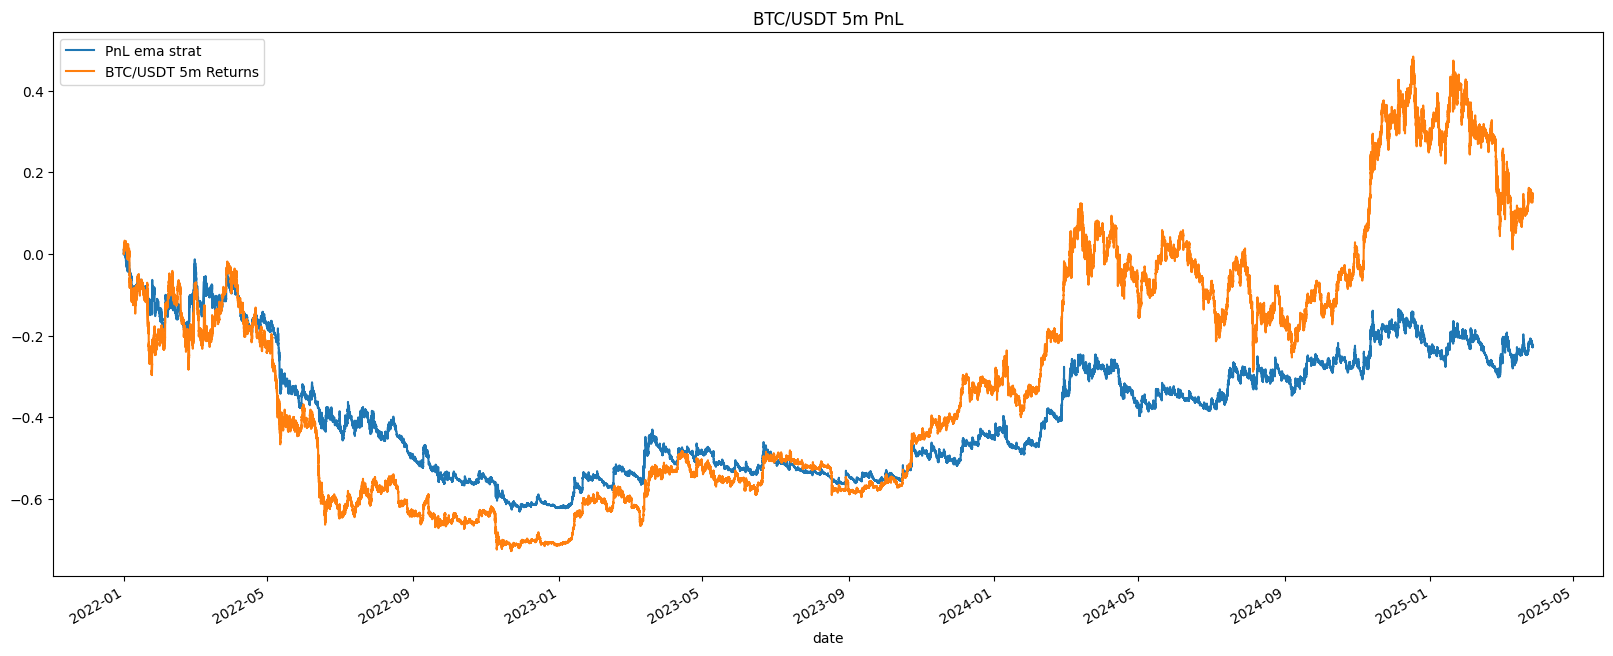

In [10]:
#plot pnl strat
plt.figure(figsize=(20, 8))
df["cumulative_pnl"].plot(title='BTC/USDT 5m PnL', label="PnL ema strat")
df["btc_cum_returns"].plot(label="BTC/USDT 5m Returns")
plt.legend()

In [29]:
#compute yearly return for 2022, 2023, 2024
ret_2022 = df[df.index.year == 2022]["cumulative_pnl"].iloc[-1]
print(ret_2022)
df.loc[df.index.year == 2023, "btc_cum_returns_2023"] = (1 + df.loc[df.index.year == 2023, "log_returns"]).cumprod() - 1
ret_2023 = df[df.index.year == 2023]["btc_cum_returns_2023"].iloc[-1]
print(ret_2023)
#same for 2024
df.loc[df.index.year == 2024, "btc_cum_returns_2024"] = (1 + df.loc[df.index.year == 2024, "log_returns"]).cumprod() - 1
ret_2024 = df[df.index.year == 2024]["btc_cum_returns_2024"].iloc[-1]
print(ret_2024)
#2025
df.loc[df.index.year == 2025, "btc_cum_returns_2025"] = (1 + df.loc[df.index.year == 2025, "log_returns"]).cumprod() - 1
ret_2025 = df[df.index.year == 2025]["btc_cum_returns_2025"].iloc[-1]
print(ret_2025)
df[["btc_cum_returns"]]

-0.6214568816175285
1.3208199259990425
0.9147679657827263
-0.1060904574214594


,btc_cum_returns
date,
2022-01-01 00:00:00,NaN
2022-01-01 00:05:00,0.001074
2022-01-01 00:10:00,0.000240
2022-01-01 00:15:00,-0.000594
2022-01-01 00:20:00,0.001598
...,...
2025-03-28 00:15:00,0.141403
2025-03-28 00:20:00,0.139882
2025-03-28 00:25:00,0.139488
